In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# dati ISTAT
data = pd.read_csv("DCSP_COLTIVAZIONI_22032024191007716.csv")

In [4]:
# Rimozione spazi bianchi dopo le stringhe della colonna 'Tipo dato'
data['Tipo dato'] = data['Tipo dato'].str.rstrip()

In [5]:
# Elenco feature 'Tipo dato'
data["Tipo dato"].unique()

array(['produzione totale - quintali', 'produzione raccolta - quintali',
       'superficie totale - are', 'superficie totale - ettari',
       'superficie in produzione - ettari', 'unità foraggere',
       'produzione totale - ettolitri',
       'produzione totale - migliaia di quintali'], dtype=object)

In [6]:
# Elenco feature 'Territorio'
data["Territorio"].unique()

array(['Italia', 'Nord', 'Piemonte', 'Cuneo', 'Asti', 'Liguria',
       'Imperia', 'Genova', 'La Spezia', 'Lombardia', 'Varese', 'Lecco',
       'Milano', 'Bergamo', 'Brescia', 'Cremona', 'Mantova',
       'Trentino Alto Adige / Südtirol', 'Veneto', 'Vicenza', 'Treviso',
       'Venezia', 'Padova', 'Rovigo', 'Friuli-Venezia Giulia', 'Trieste',
       'Emilia-Romagna', 'Piacenza', 'Parma', 'Bologna', 'Ferrara',
       'Forlì-Cesena', 'Centro', 'Toscana', 'Massa-Carrara', 'Firenze',
       'Prato', 'Livorno', 'Arezzo', 'Grosseto', 'Umbria', 'Perugia',
       'Marche', 'Pesaro e Urbino', 'Ancona', 'Macerata', 'Ascoli Piceno',
       'Lazio', 'Roma', 'Latina', 'Frosinone', 'Mezzogiorno', 'Campania',
       'Caserta', 'Napoli', 'Salerno', 'Puglia', 'Brindisi', 'Calabria',
       'Catanzaro', 'Reggio di Calabria', 'Sicilia', 'Agrigento',
       'Catania', 'Sardegna', 'Sassari', 'Nuoro', 'Cagliari', 'Oristano',
       'Olbia-Tempio', 'Ogliastra', 'Medio Campidano',
       'Carbonia-Iglesias',

In [7]:
# Filtro 'Tipo dato' di interesse
data_filtered = data[data["Tipo dato"].isin(['superficie totale - ettari', 'superficie totale - are', 
                                           'superficie in produzione - ettari', 'produzione totale - quintali', 
                                           'produzione totale - migliaia di quintali', 'produzione raccolta - quintali'])]

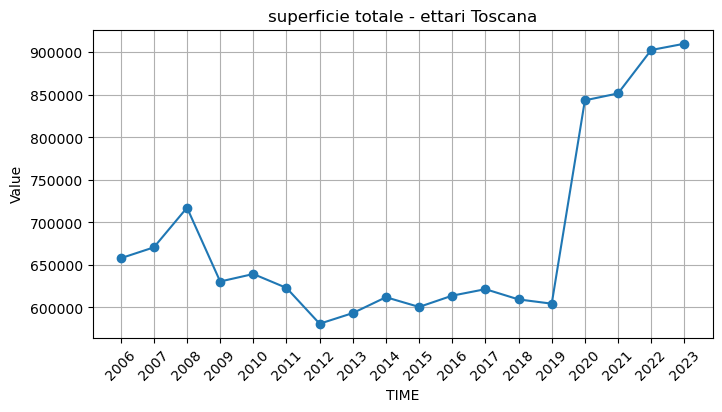

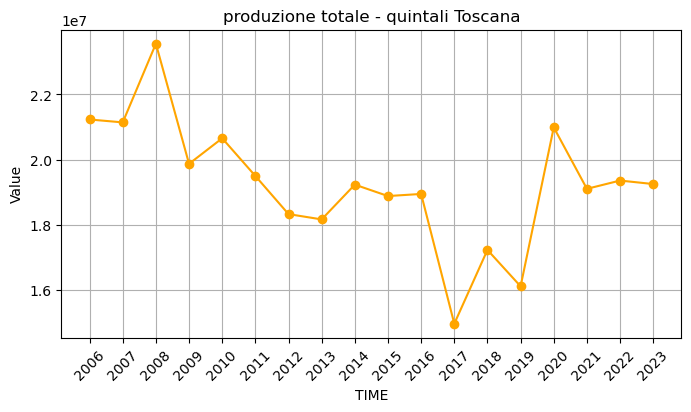

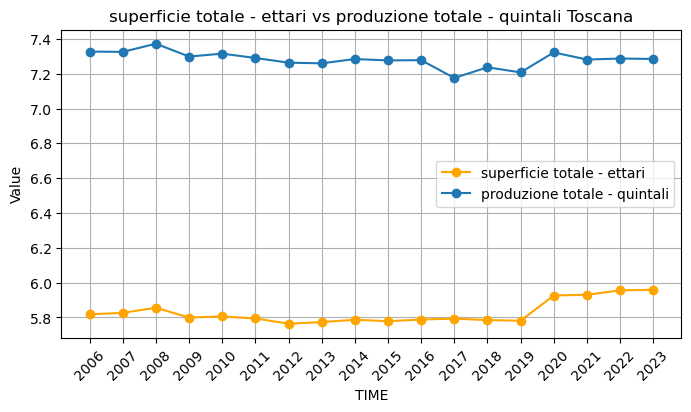

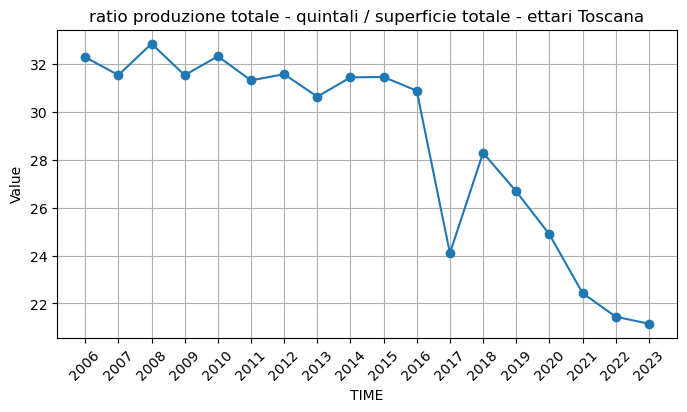

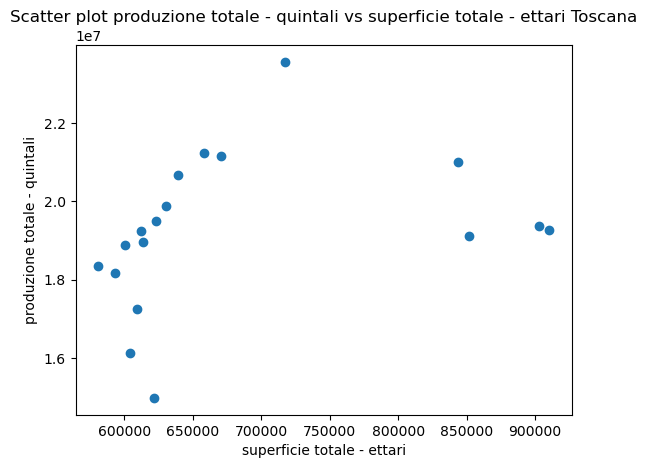

,produzione raccolta - quintali,produzione totale - migliaia di quintali,produzione totale - quintali,superficie in produzione - ettari,superficie totale - are,superficie totale - ettari
produzione raccolta - quintali,1.000000,-0.340239,0.304253,0.964635,-0.069232,0.945960
produzione totale - migliaia di quintali,-0.340239,1.000000,-0.364592,0.108335,-0.030661,-0.131737
produzione totale - quintali,0.304253,-0.364592,1.000000,0.230260,0.365441,0.304393
superficie in produzione - ettari,0.964635,0.108335,0.230260,1.000000,-0.103928,0.976643
superficie totale - are,-0.069232,-0.030661,0.365441,-0.103928,1.000000,-0.021679
superficie totale - ettari,0.945960,-0.131737,0.304393,0.976643,-0.021679,1.000000


In [8]:
# Selezione del territorio di interesse
territorio = 'Toscana'

# Selezione degli attributi che si vogliono osservare
attributo_1 = 'superficie totale - ettari'
attributo_2 = 'produzione totale - quintali'
#attributo_1 = 'produzione totale - quintali'
#attributo_2 = 'produzione raccolta - quintali'
#attributo_1 = 'superficie totale - ettari'
#attributo_2 = 'superficie in produzione - ettari'

data_filtered2 = data_filtered[data_filtered['Territorio'] == territorio]
column_of_interest = ['Tipo dato', 'Tipo di coltivazione', 'TIME', 'Value']
data_filtered3 = data_filtered2[column_of_interest]

# Calcolo valore totale per Tipo dato e TIME
summarized_df = data_filtered3.groupby(['Tipo dato', 'TIME'])['Value'].sum().reset_index()

# Rimozione anno 2024 perchè mancano dei dati
summarized_df = summarized_df[summarized_df['TIME'] != 2024]

# Selezione primo attributo
attributo_1_df = summarized_df[summarized_df['Tipo dato'] == attributo_1]

# Plot primo attributo
plt.figure(figsize=(8,4))
plt.plot(attributo_1_df['TIME'], attributo_1_df['Value'], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
plt.xticks(rotation=45)
plt.title(attributo_1 + ' ' + territorio)
plt.grid()
plt.show()

# Selezione secondo attributo
attributo_2_df = summarized_df[summarized_df['Tipo dato'] == attributo_2]

# Plot secondo attributo
plt.figure(figsize=(8,4))
plt.plot(attributo_2_df['TIME'], attributo_2_df['Value'], marker='o', color='orange')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
plt.xticks(rotation=45)
plt.title(attributo_2 + ' ' + territorio)
plt.grid()
plt.show()

# Plot primo attributo vs secondo attributo
plt.figure(figsize=(8,4))
plt.plot(attributo_1_df['TIME'], np.log10(attributo_1_df['Value']), label = attributo_1, marker='o', color = 'orange')
plt.plot(attributo_2_df['TIME'], np.log10(attributo_2_df['Value']), label = attributo_2, marker='o')
#plt.plot(sup_totale_ettari['TIME'], sup_totale_ettari['Value'], marker='o')
#plt.plot(prod_tot_quintali['TIME'], prod_tot_quintali['Value'], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
#plt.yticks(range(7,8))
plt.xticks(rotation=45)
plt.legend()
plt.title(attributo_1 + ' vs ' + attributo_2 + ' ' + territorio)
plt.grid()
plt.show()

# Pivot table per calcolare ratio secondo attributo / primo attributo 
pivot_df = summarized_df.pivot_table(index='TIME', columns='Tipo dato', values='Value')

pivot_df = pd.DataFrame(pivot_df.to_records())

pivot_df['ratio'] = pivot_df[attributo_2]/pivot_df[attributo_1]

# Plot ratio secondo attributo / primo attributo
plt.figure(figsize=(8,4))
plt.plot(pivot_df['TIME'], pivot_df['ratio'], marker='o')
plt.xlabel('TIME')
plt.ylabel('Value')
plt.xticks(range(2006, 2024))
#plt.yticks(range(7,8))
plt.xticks(rotation=45)
plt.title('ratio ' + attributo_2 + ' / ' + attributo_1 + ' ' + territorio)
plt.grid()
plt.show()

# Scatter plot
df_for_corr = pivot_df.drop(columns = ['TIME', 'ratio'])
plt.scatter(df_for_corr[attributo_1], df_for_corr[attributo_2])
plt.xlabel(attributo_1)
plt.ylabel(attributo_2)
plt.title('Scatter plot ' + attributo_2 + ' vs ' + attributo_1 + ' ' + territorio)
plt.show()

# Matrice di correlazione
corr_matrix = df_for_corr.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

In [33]:
# Salva il dataframe come CSV
toscana = pd.read_csv('Toscana_counts.csv', sep=';')
sicilia = pd.read_csv('Sicilia_counts.csv', sep=';')
puglia = pd.read_csv('Puglia_counts.csv', sep=';')
veneto = pd.read_csv('Veneto_counts.csv', sep=';')

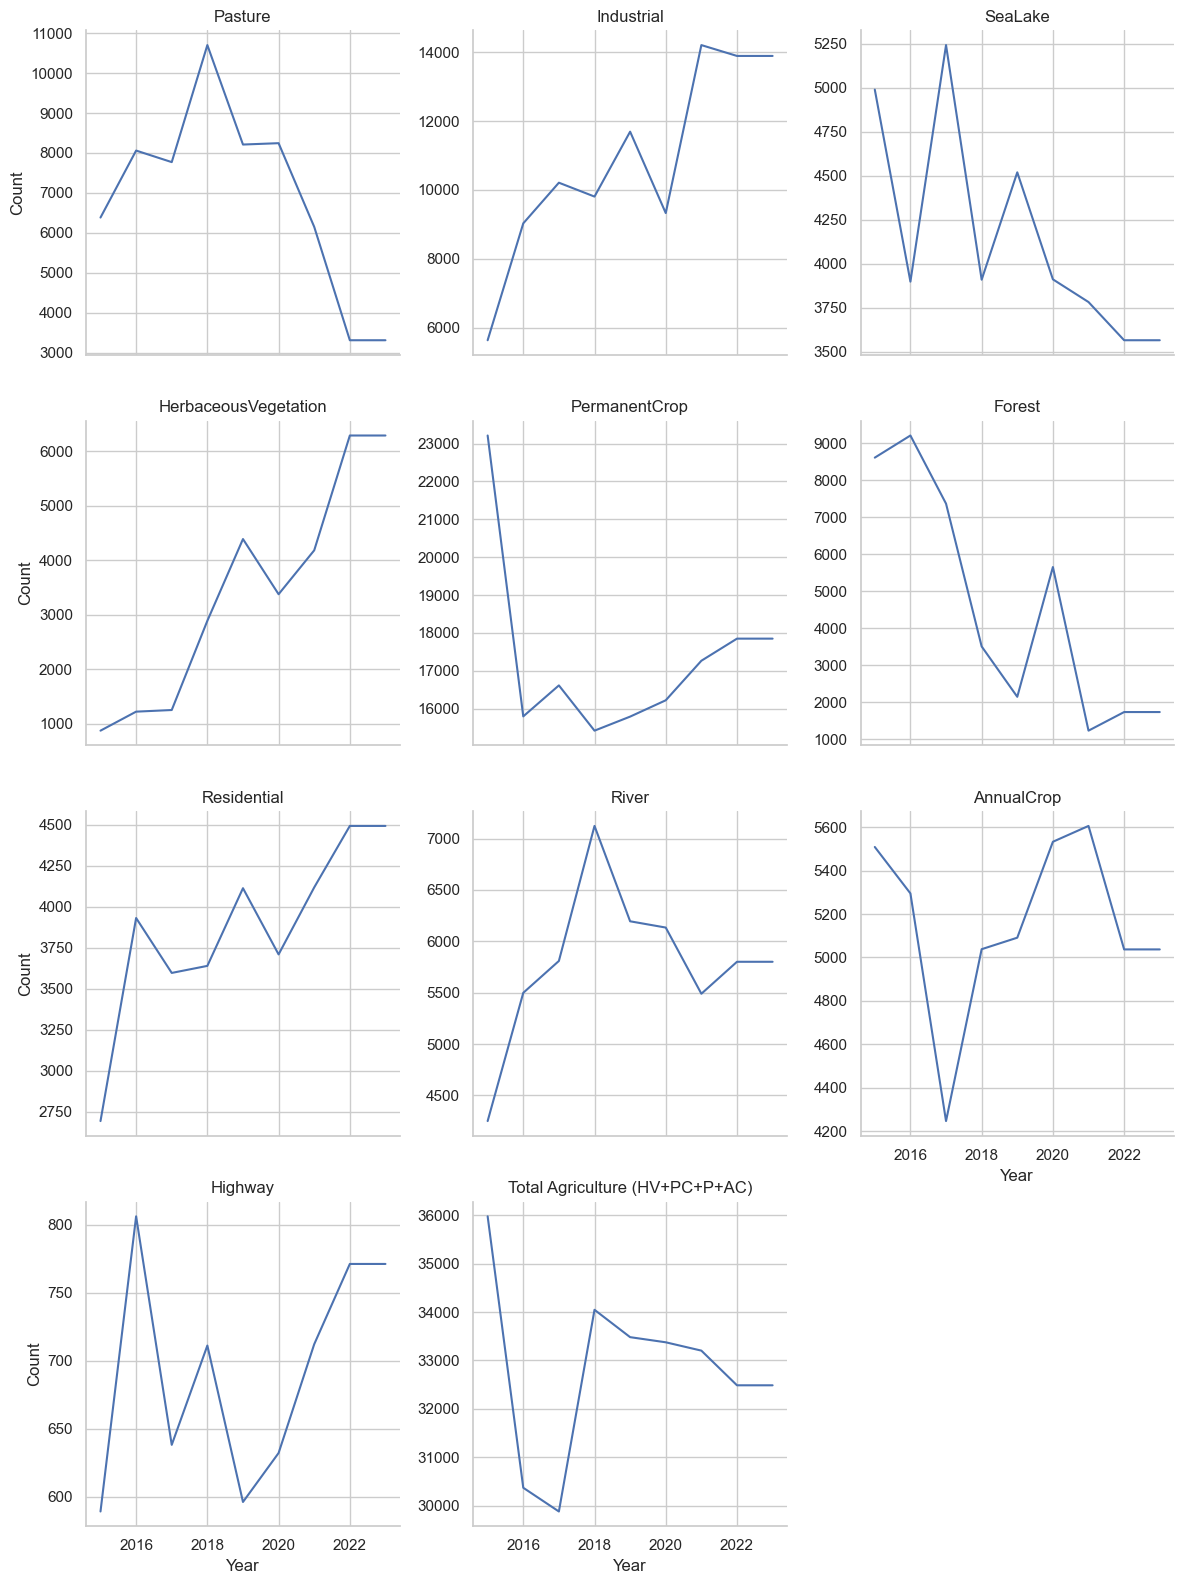

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df_final = veneto

# Step 2: Transform the DataFrame into a long format
df_long = pd.melt(df_final, id_vars=['pred'], var_name='year', value_name='count')

# Step 3: Extract the year from the string and handle NaN values
df_long['year'] = df_long['year'].str.extract('(\d{4})')

# Drop rows where 'year' extraction failed
df_long = df_long.dropna(subset=['year'])

# Convert 'year' to integer type
df_long['year'] = df_long['year'].astype(int)

# Step 4: Set the Seaborn style
sns.set(style="whitegrid")

# Step 5: Create a figure with subplots for each category
g = sns.FacetGrid(df_long, col='pred', col_wrap=3, sharey=False, height=4)
g.map(sns.lineplot, 'year', 'count')

# Add titles and adjust the layout
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Count")
g.fig.tight_layout()

# Show the plots
plt.show()